In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
import sklearn
import tensorflow as tf

In [33]:
prices_df = pd.read_pickle("C:/Users/abhij/Git Repos/DeepLearningLabs/RNNs_in_Action/training_yfinance.pkl")

In [34]:
prices_df = prices_df.dropna()

In [35]:
## Section 1: Selection of Ticker for Creating Initial Dataset for Training
valid_set_size_percentage = 10 
test_set_size_percentage = 10 
prices_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2012-08-30,20.538297,20.566165,20.299728,20.330965,302699600.0,0.0,0.0,AAPL
2012-08-31,20.434473,20.475816,20.128223,20.372917,338321200.0,0.0,0.0,AAPL
2012-09-04,20.388843,20.676104,20.350256,20.670898,367892000.0,0.0,0.0,AAPL
2012-09-05,20.689286,20.713173,20.506455,20.525749,336375200.0,0.0,0.0,AAPL
2012-09-06,20.615781,20.772581,20.543200,20.710718,391196400.0,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2022-08-23,0.680000,0.683000,0.602000,0.663000,59400.0,0.0,0.0,APCX
2022-08-24,0.658000,0.683000,0.640000,0.650000,64400.0,0.0,0.0,APCX
2022-08-25,0.650000,0.683000,0.601000,0.654000,81200.0,0.0,0.0,APCX


In [36]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [37]:
# choose one stock
ticker_prices_df = prices_df[prices_df["Ticker"] == 'AAPL'].copy()
ticker_prices_df.drop(['Volume'],1,inplace=True)
ticker_prices_df.drop(['Stock Splits'],1,inplace=True)
ticker_prices_df.drop(['Dividends'],1,inplace=True)
ticker_prices_df.drop(['Ticker'],1,inplace=True)

cols = list(ticker_prices_df.columns.values)
print('ticker_prices_df.columns.values = ', cols)

# normalize stock
ticker_prices_df_norm = ticker_prices_df.copy()
ticker_prices_df_norm = normalize_data(ticker_prices_df_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(ticker_prices_df_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

ticker_prices_df.columns.values =  ['Open', 'High', 'Low', 'Close']
x_train.shape =  (1995, 19, 4)
y_train.shape =  (1995, 4)
x_valid.shape =  (250, 19, 4)
y_valid.shape =  (250, 4)
x_test.shape =  (250, 19, 4)
y_test.shape =  (250, 4)


C:\Users\abhij\AppData\Local\Temp\ipykernel_19476\2473759875.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ticker_prices_df.drop(['Volume'],1,inplace=True)
C:\Users\abhij\AppData\Local\Temp\ipykernel_19476\2473759875.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ticker_prices_df.drop(['Stock Splits'],1,inplace=True)
C:\Users\abhij\AppData\Local\Temp\ipykernel_19476\2473759875.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ticker_prices_df.drop(['Dividends'],1,inplace=True)
C:\Users\abhij\AppData\Local\Temp\ipykernel_19476\2473759875.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ticker_prices_df.drop(['Ticker'],1,inpla

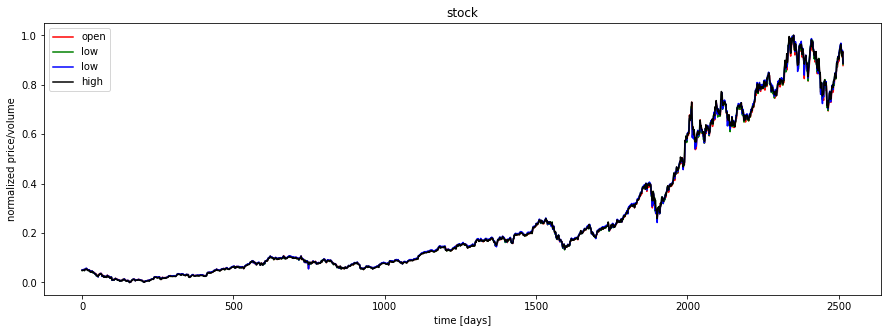

In [38]:
plt.figure(figsize=(15, 5));
plt.plot(ticker_prices_df_norm.Open.values, color='red', label='open')
plt.plot(ticker_prices_df_norm.Close.values, color='green', label='low')
plt.plot(ticker_prices_df_norm.Low.values, color='blue', label='low')
plt.plot(ticker_prices_df_norm.High.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [9]:
## Section 2: Modelling and Validation

In [10]:
x_train.shape

(1995, 19, 4)

In [11]:
#reshape the data
# x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
# x_train

In [12]:
#build the LSTM model
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],4)))
model.add(tf.keras.layers.LSTM(50,return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(4))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 19, 50)            11000     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 4)                 104       
                                                                 
Total params: 32,579
Trainable params: 32,579
Non-trainable params: 0
_________________________________________________________________


In [21]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

#train the model
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1995/1995 [==============================] - 23s 10ms/step - loss: 1.2758e-04
Epoch 2/10
1995/1995 [==============================] - 21s 10ms/step - loss: 1.1263e-04
Epoch 3/10
1995/1995 [==============================] - 21s 10ms/step - loss: 7.2202e-05
Epoch 4/10
1995/1995 [==============================] - 21s 10ms/step - loss: 8.5241e-05
Epoch 5/10
1995/1995 [==============================] - 21s 11ms/step - loss: 1.4587e-04
Epoch 6/10
1995/1995 [==============================] - 28s 14ms/step - loss: 1.2740e-04
Epoch 7/10
1995/1995 [==============================] - 21s 10ms/step - loss: 5.0611e-05
Epoch 8/10
1995/1995 [==============================] - 20s 10ms/step - loss: 8.0571e-05
Epoch 9/10
1995/1995 [==============================] - 24s 12ms/step - loss: 6.0601e-05
Epoch 10/10
1995/1995 [==============================] - 34s 17ms/step - loss: 7.6421e-05


In [22]:
predictions = model.predict(x_test)

8/8 [==============================] - 1s 8ms/step


In [23]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.0025701480468389376

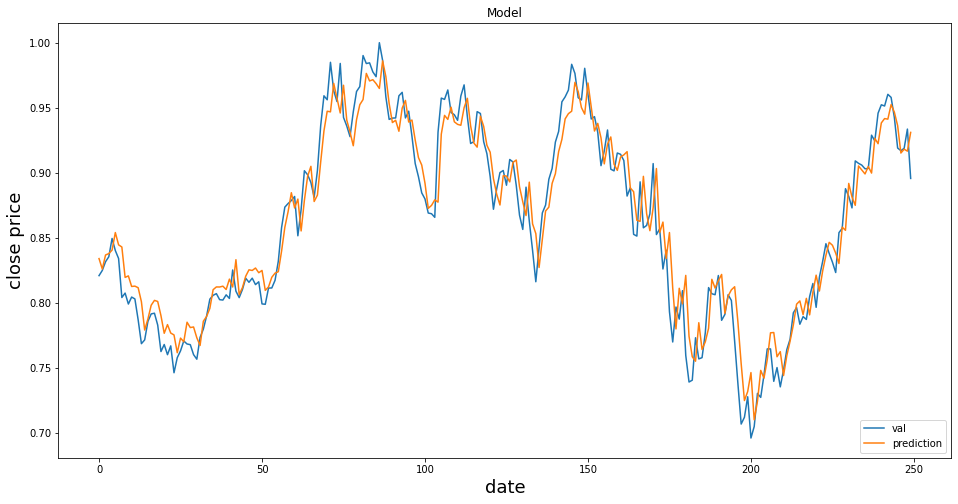

In [50]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(y_test[:,-1])
plt.plot(predictions[:,-1])
plt.legend(['val','prediction'],loc='lower right')
plt.show()